# Part I - Bike Dataset Exploration
## by Maduabuchi Anamelechi

## Introduction
> The Dataset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area...
    
    The Columns contained in the datasets are:
    > duration_sec
    > start_time
    > end_time
    > start_station_id
    > start_station_name
    > start_station_latitude
    > start_station_longitude
    > end_station_id
    > end_station_name
    > end_station_latitude
    > end_station_longitude
    > bike_id
    > user_type ("Subscriber" = Member, "Customer" = Casual)
    > member_birth_year
    > member_gender
    > bike_share_for_all_trip

  



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties.


In [3]:
# Reading in both csv files for the two cities into a pandas dataframe...

bike_df = pd.read_csv('San_francisco_bay_area_bike_data_201902.csv')
print(bike_df.shape)
bike_df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Wrangle
> I found out that some columns has a wrong datatype.

> I also seperated the date and time for both `start_date` and `end_time` columns.

> I dropped the null values in the dataset too.

> Finally i dropped the columns that are not needed for the analysis

In [4]:
# check the Datatypes of the columns...

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Extract the date and time from the date time columns...

bike_df["start_datetime"] = bike_df["start_time"].str[:19]
bike_df["end_datetime"] = bike_df["end_time"].str[:19]
bike_df[["start_date","start_time"]] = bike_df["start_datetime"].str.split(expand=True)
bike_df[["end_date","end_time"]] = bike_df["end_datetime"].str.split(expand=True)

In [6]:
# Check for Null values

bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_datetime                0
end_datetime                  0
start_date                    0
end_date                      0
dtype: int64

In [7]:
# Drop the Null Values...

bike_df = bike_df.dropna().reset_index()

In [8]:
# Change the datatype of columns with wrong Datatypes

bike_df["start_datetime"] = bike_df["start_datetime"].astype('datetime64[ns]')
bike_df["start_date"] = bike_df["start_date"].astype('datetime64[ns]')
bike_df["end_date"] = bike_df["end_date"].astype('datetime64[ns]')
bike_df["start_time"] = bike_df["start_time"].astype('datetime64[ns]')
bike_df["end_time"] = bike_df["end_time"].astype('datetime64[ns]')
bike_df["end_datetime"] = bike_df["end_datetime"].astype('datetime64[ns]')
bike_df["start_station_id"] = bike_df["start_station_id"].astype(int)
bike_df["end_station_id"] = bike_df["end_station_id"].astype(int)
bike_df["member_birth_year"] = bike_df["member_birth_year"].astype(int)

In [9]:
# Drop the columns that are not needed

#bike_df.reset_index()
bike_df.drop(columns=["index", "start_station_latitude", "start_station_longitude", "end_station_latitude",
                      "end_station_longitude"], inplace=True)

In [10]:
# Confirm that it worked...

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_datetime             174952 non-null datetime64[ns]
end_datetime               174952 non-null datetime64[ns]
start_date                 174952 non-null datetime64[ns]
end_date                   174952 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(5), object(5)

In [11]:
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_datetime             0
end_datetime               0
start_date                 0
end_date                   0
dtype: int64

In [12]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_datetime,end_datetime,start_date,end_date
0,52185,2022-09-10 17:32:10,2022-09-10 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,2019-02-28 17:32:10,2019-03-01 08:01:55,2019-02-28,2019-03-01
1,61854,2022-09-10 12:13:13,2022-09-10 05:24:08,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2019-02-28 12:13:13,2019-03-01 05:24:08,2019-02-28,2019-03-01
2,36490,2022-09-10 17:54:26,2022-09-10 04:02:36,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,2019-02-28 17:54:26,2019-03-01 04:02:36,2019-02-28,2019-03-01
3,1585,2022-09-10 23:54:18,2022-09-10 00:20:44,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2019-02-28 23:54:18,2019-03-01 00:20:44,2019-02-28,2019-03-01
4,1793,2022-09-10 23:49:58,2022-09-10 00:19:51,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,No,2019-02-28 23:49:58,2019-03-01 00:19:51,2019-02-28,2019-03-01


### What is the structure of your dataset?

> The dataset contains the bike ride data for `February 2019` from the city of `San Francisco`. After the wrangle process, the dataset has `174952` rows and `16` columns.

### What is/are the main feature(s) of interest in your dataset?

> Does Age range affect the duration of the ride..?

> What is the distribution of the start and end dates..?

> What is the relationship between Duration time and Gender..?

> Is there a relationship between bike share and gender..?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Duration_sec, member_birth_year, start_date, end_date, gender, bike_share_for_all_trip

## Univariate Exploration

> In this section, investigate distributions of individual variables.

#### What is the distribution of trip duration..?

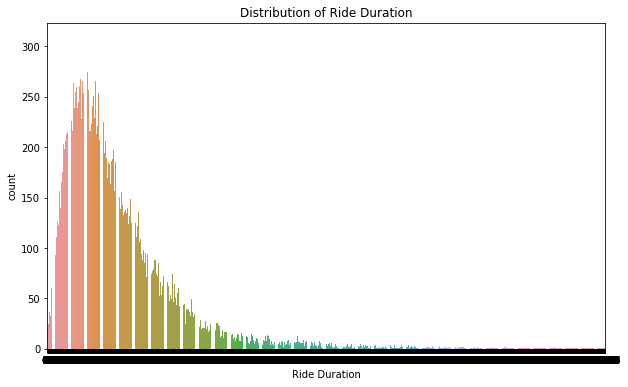

In [13]:
plt.figure(figsize=[10,6])
sb.countplot(data= bike_df, x='duration_sec')
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration');

### Observation

> From our chart above, we can see that the chart is skewed to the right but we cant clearly see the distribution here. Therefore lets increase the bin edges. And limit the X axis to smaller fucos group


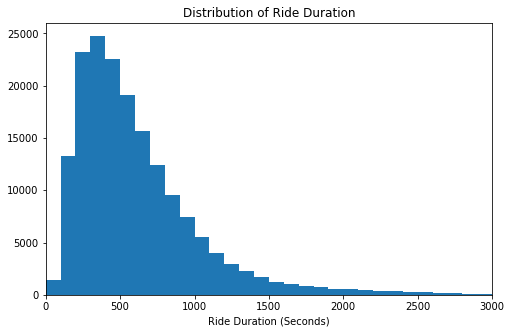

In [14]:
binedges = np.arange(0, bike_df['duration_sec'].max() + 100 , 100)

plt.figure(figsize=[8,5])
plt.hist(data= bike_df, x='duration_sec', bins= binedges)
plt.xlim(0,3000)
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (Seconds)');

We can see clearly that the Ride duration column is highly skewed to the right.

> Without limiting the x-axis it will be almost impossible to see the relation of the `duration_sec` column. Going forward we will convert the measurment from seconds to minutes and scale the x axis.

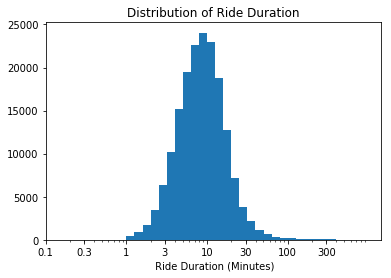

In [15]:
bike_df["duration_min"] = bike_df["duration_sec"] / 60
bike_df.drop("duration_sec" , axis = 1 , inplace = True)

binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [0.1, 0.3, 1, 3, 10, 30, 100, 300]
ax = plt.axes()
plt.hist(data = bike_df , x = 'duration_min' , bins = binedges);
plt.xscale('log')
ax.set_xticks(ticks)
ax.set_xticklabels(['0.1', '0.3', '1', '3', '10', '30', '100', '300'])
ax.set_title('Distribution of Ride Duration')
ax.set_xlabel(' Ride Duration (Minutes)')

plt.show();

From the above chart we can now clearly see that most people ride for just a short period. `Around ten (10) minutes`

#### Distribution of the User Type Column
> Lets see the distribution of the `user_type` column

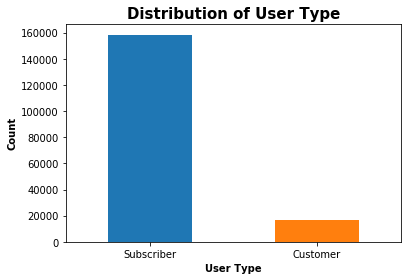

In [16]:
bike_df['user_type'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('User Type', fontsize=10, weight='bold')
plt.ylabel('Count', fontsize=10, weight='bold')
plt.title('Distribution of User Type', fontsize=15, weight='bold');

### Observation
> From the chart above we see that the people that uses the ride more are the `subscribers`

#### Distribution of the Start Date Column

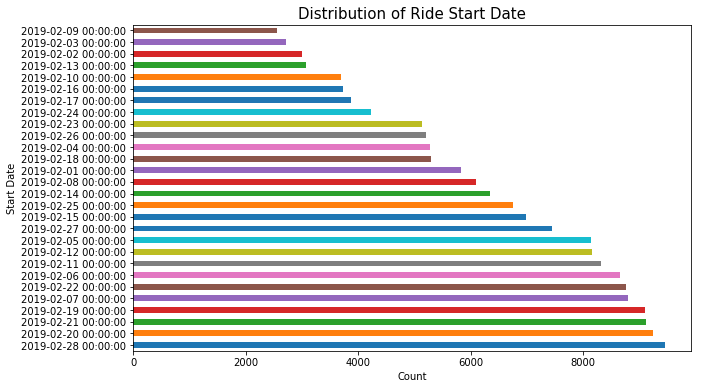

In [18]:
plt.figure(figsize=[10,6])
bike_df["start_date"].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Start Date')
plt.title('Distribution of Ride Start Date', fontsize=15);

From the chart above we can see that there are more riders towards the end of the month that the begining given the month in consideration.

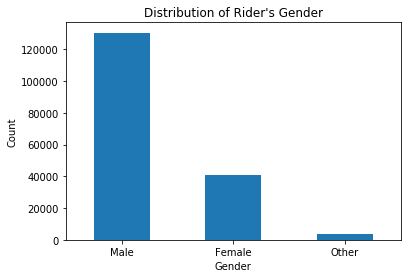

In [17]:
df = pd.DataFrame(bike_df["member_gender"].value_counts())
df.plot(kind='bar', rot=0, legend=False)
plt.xlabel('Gender')
plt.ylabel("Count")
plt.title("Distribution of Rider's Gender");

From the above chart we can see that the prevalent gender is Male...

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I found out the `duration_sec` column was greatly skewed to the right
> It was also revealed that there were more riders towards the end of the month
> It was also revealed that the subscribers rode more than casual constomers
> it was revealed too that the male gender was way more than others..

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, on the `duration_sec` column i had to transformed the measurement from seconds to minutes thereby createing a `duration_min` column and applied a log transformation to clearly see the distribution

## Bivariate Exploration

####  To further our analysis, does gender afect the duration time of the ride?

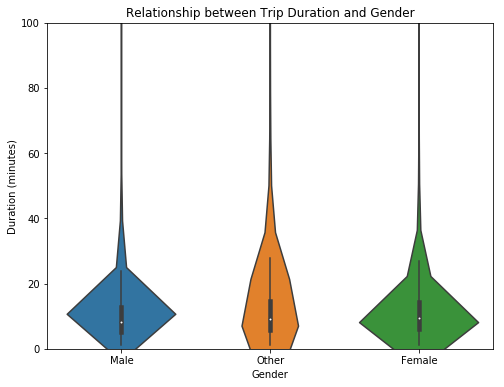

In [18]:
plt.figure(figsize=[8,6])
sb.violinplot(data = bike_df, x = 'member_gender', y = 'duration_min')
plt.ylim(0, 100)
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.title('Relationship between Trip Duration and Gender');

From the above chart those that didn't specify their gender has the highest average duration time followed by the female gender.

#### What is the relationship between the User type and duration time..?

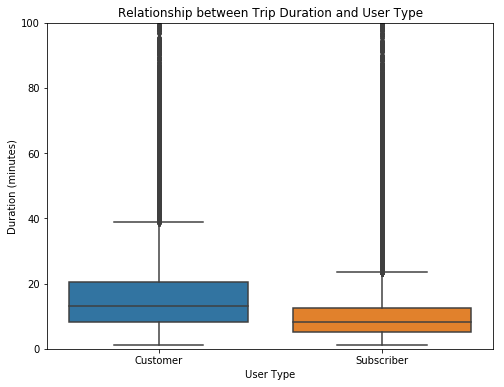

In [19]:
plt.figure(figsize=[8,6])
sb.boxplot(data = bike_df, x = 'user_type', y = 'duration_min')
plt.ylim(0, 100)
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title('Relationship between Trip Duration and User Type');

From the chart above we can see that the casual customers spend more time on their ride than the subscribers...

#### What is the relationship between `Gender` and `User Type`..?

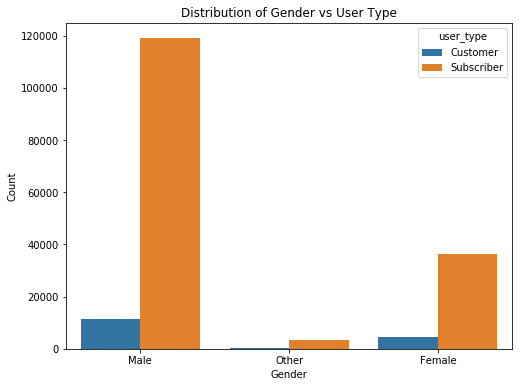

In [24]:
plt.figure(figsize=[8,6])
sb.countplot(data = bike_df, x = 'member_gender', hue = 'user_type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender vs User Type');

From the chart above, the male gender forms a higher percent of the user type especially the subscribers.

#### What is the relationship between `Bike Share` and `User Type`..?

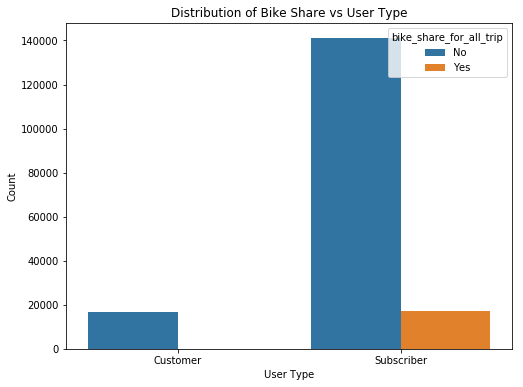

In [59]:
plt.figure(figsize=[8,6])
sb.countplot(data= bike_df, x='user_type', hue='bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of Bike Share vs User Type');

From the above chart a good number of subscribers don't share bike during their ride.

#### Did those who share bike spend more time on their ride..?

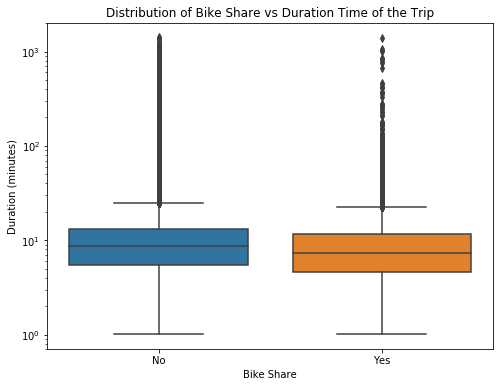

In [72]:
plt.figure(figsize=[8,6])
sb.boxplot(data= bike_df, x='bike_share_for_all_trip', y='duration_min')
#plt.ylim(0,100)
plt.yscale('log')
plt.xlabel('Bike Share')
plt.ylabel('Duration (minutes)')
plt.title('Distribution of Bike Share vs Duration Time of the Trip');

From the above transformed chart, we can see that those who didnt share their bike during the ride spends a little longer time on the average compared to those who shared their bike during the ride.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A good number of subscribers don't share bike during their ride.

> The male gender forms a higher percent of the user type especially the subscribers.

> The casual customers spend more time on their ride than the subscribers.

> Those that didn't specify their gender has the highest average duration time followed by the female gender.

> Those who didnt share their bike during the ride spends a little longer time on the average compared to those who shared their bike during the ride.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No interesting relationships observed.

## Multivariate Exploration

#### Which gender spends more time on their ride for the two customer types..?

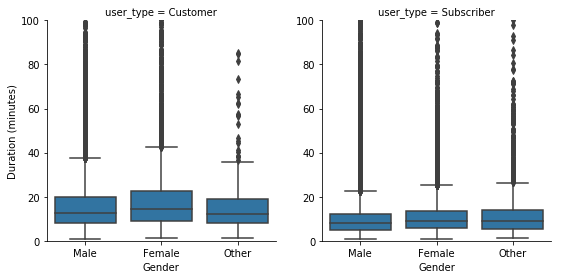

In [94]:
g = sb.FacetGrid(data = bike_df, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'duration_min', order=["Male", "Female", "Other"])
plt.ylim(0, 100)
g.set_xlabels('Gender')
g.set_ylabels('Duration (minutes)');

From the chart above, on the average the female gender spend more time on their ride compared to other genders for both customer types.

#### Which customer type spends more time on their ride looking at their bike share data..?

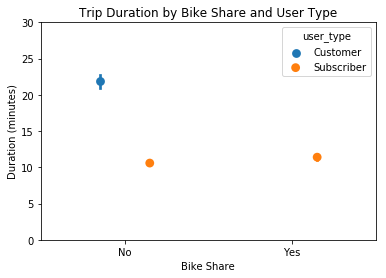

In [100]:
ax = sb.pointplot(data = bike_df, x = 'bike_share_for_all_trip', y = 'duration_min', hue = 'user_type',
                  dodge = 0.3, linestyles = "")
ax.set_xlabel('Bike Share')
ax.set_ylabel('Duration (minutes)')
ax.set_ylim(0,30)
ax.set_title('Trip Duration by Bike Share and User Type');

From the relationship above, we can see that casual customers that didn't share their bike spent more time their ride.

#### Which gender spends more time on their ride looking at their bike share data..?

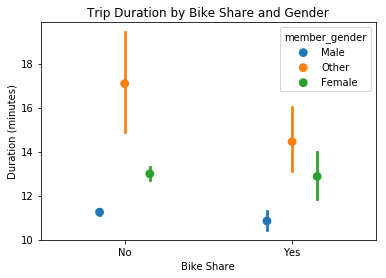

In [102]:
ax = sb.pointplot(data = bike_df, x = 'bike_share_for_all_trip', y = 'duration_min', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
ax.set_xlabel('Bike Share')
ax.set_ylabel('Duration (minutes)')
#ax.set_ylim(0,30)
ax.set_title('Trip Duration by Bike Share and Gender');

From the chart above those who didnt specify their gender that didnt share their bike spent more time during their ride...

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The gender that spends more time on their ride for the two customer types.

> The customer type that spends more time on their ride looking at their bike share data

> Which gender spends more time on their ride looking at their bike share data

### Were there any interesting or surprising interactions between features?

> On the average the female gender spend more time on their ride compared to other genders for both customer types.

> Casual customers that didn't share their bike spent more time on their ride.

> Those who didnt specify their gender and didnt share their bike spent more time during their ride.

## Conclusions
>Having explored the bike share dataset, it was awesome exploring the relationship between between various features in the dataset.

>The key takeaway observation from the dataset is that casual customer has the tendency to rent the bike for a longer period, so the store should horn their startegy to attract more casual customers.
